In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [2]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

180000 rows
360000 rows
540000 rows


In [3]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [4]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [5]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [6]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [7]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.499987500312492,0.285710204139941,0.249993750156246,0.199996000079998,0.374995312558593,0.230767455634957,1.0,0.0,5.0,10.5,...,24.5721938312054,4.8510981798172,12.7014119257219,2.45879995822906,1.13414718210697,0.0916407406330109,13.0447858739644,0.466350100934506,22.023910343647,-0.949894309043884
2,0.749981250468738,0.749981250468738,0.499975001249937,0.33332222259258,0.666655555740738,0.571420408279882,0.0,0.0,1.0,6.5,...,6.86564123630524,2.46064087748528,-3.04449915885925,1.13504311442375,-5.97205317020416,3.40982826426625,-4.27925926074386,2.43112331628799,8.48754724860191,9.82105846144259
3,0.0,0.0,0.249993750156246,0.14285510206997,0.0769224852116522,0.0357141581637208,0.0,0.0,15.0,20.5,...,7.06980419158936,14.0090050846338,-0.788387708365917,3.10477311164141,6.63935904484242,-6.48020757734776,-30.0322804264724,15.1858156919479,15.9504325389862,-2.92057529091835
4,0.999975000624984,0.799984000319994,0.999966667777741,0.749981250468738,0.874989062636717,0.77776913589849,1.0,1.0,1.0,8.5,...,22.8402632176876,17.8422814235091,11.6507564298809,-12.9146541133523,9.22390427067876,10.7153894603252,-9.87618760764599,19.4914917945862,13.9903196692467,3.05930843763053
5,0.66664444518516,0.399992000159997,0.799984000319994,0.571420408279882,0.599994000059999,0.499995833368055,0.0,0.0,2.0,11.0,...,20.6484866831452,19.4826641976833,11.5815705768764,-2.34802420437336,4.91044919192791,-4.47806750237942,-22.3100030347705,10.6734807118773,10.4096670262516,0.712031707167625


<h2> 4.2 Converting strings to numerics </h2>

In [8]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [9]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [10]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [11]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


In [12]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6320428571428571 Class 1:  0.36795714285714287
---------- Distribution of output variable in train data ----------
Class 0:  0.36793333333333333 Class 1:  0.36793333333333333


In [48]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8821355041150899


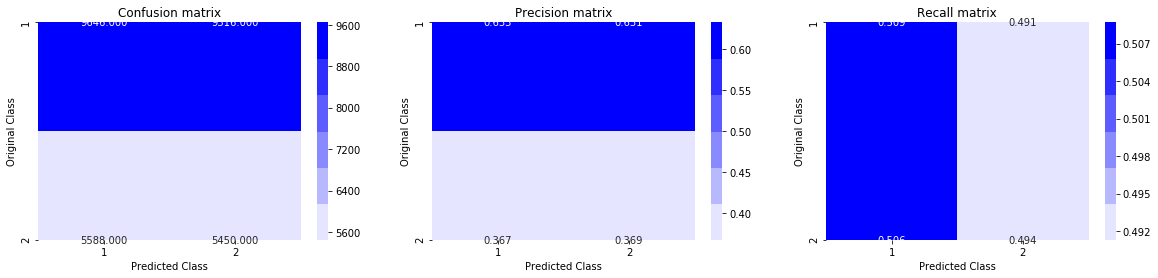

In [14]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5117087333625406
For values of alpha =  0.0001 The log loss is: 0.44842301209301205
For values of alpha =  0.001 The log loss is: 0.45158665204694187
For values of alpha =  0.01 The log loss is: 0.4515715299859198
For values of alpha =  0.1 The log loss is: 0.44913798578971353
For values of alpha =  1 The log loss is: 0.4716320532278571
For values of alpha =  10 The log loss is: 0.5144039454033483


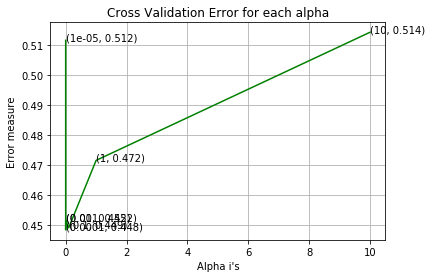

For values of best alpha =  0.0001 The train log loss is: 0.4432958253119706
For values of best alpha =  0.0001 The test log loss is: 0.44842301209301205
Total number of data points : 30000


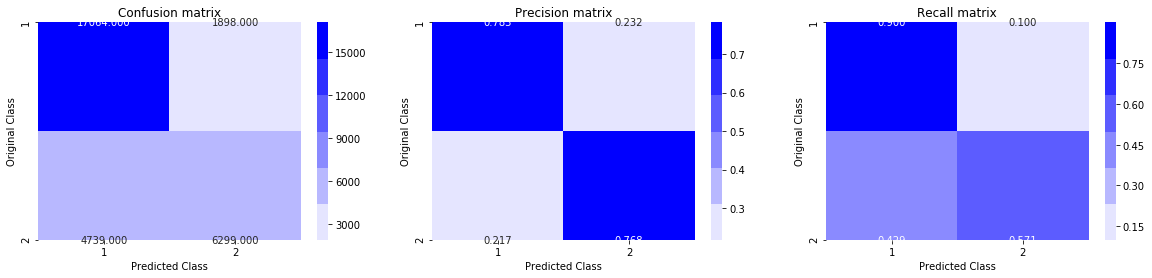

In [15]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6578466012308157
For values of alpha =  0.0001 The log loss is: 0.6578466012308157
For values of alpha =  0.001 The log loss is: 0.6578466012308157
For values of alpha =  0.01 The log loss is: 0.5843582969304019
For values of alpha =  0.1 The log loss is: 0.6345193288591028
For values of alpha =  1 The log loss is: 0.6256340148743068
For values of alpha =  10 The log loss is: 0.6533257548347027


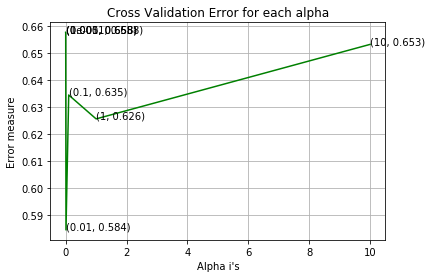

For values of best alpha =  0.01 The train log loss is: 0.581800589547008
For values of best alpha =  0.01 The test log loss is: 0.5843582969304019
Total number of data points : 30000


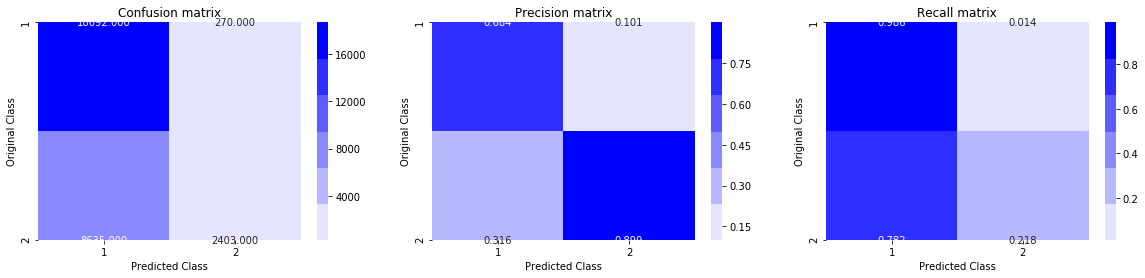

In [16]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [17]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684807	valid-logloss:0.68484
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.613766	valid-logloss:0.613987
[20]	train-logloss:0.562486	valid-logloss:0.562931
[30]	train-logloss:0.52439	valid-logloss:0.525093
[40]	train-logloss:0.494954	valid-logloss:0.495954
[50]	train-logloss:0.471986	valid-logloss:0.473233
[60]	train-logloss:0.453459	valid-logloss:0.455033
[70]	train-logloss:0.438724	valid-logloss:0.440589
[80]	train-logloss:0.426442	valid-logloss:0.428546
[90]	train-logloss:0.416782	valid-logloss:0.419059
[100]	train-logloss:0.409037	valid-logloss:0.411471
[110]	train-logloss:0.402113	valid-logloss:0.404707
[120]	train-logloss:0.396636	valid-logloss:0.399442
[130]	train-logloss:0.391681	valid-logloss:0.394683
[140]	train-logloss:0.387463	valid-logloss:0.390766
[150]	train-logloss:0.383783	valid-logloss:0.387373
[160]	train-logloss:0.380669	v

Total number of data points : 30000


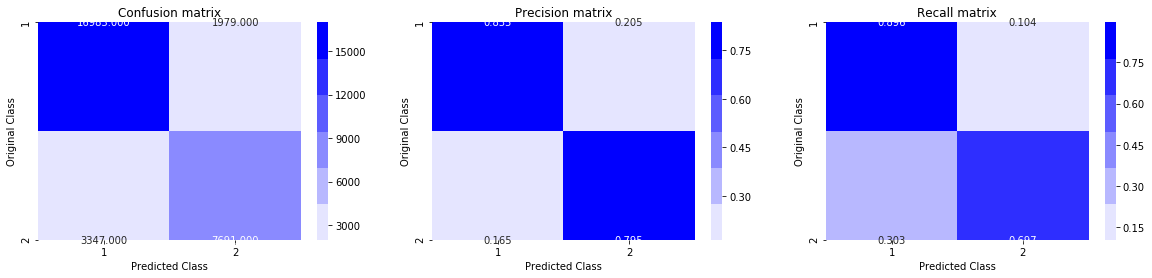

In [18]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Perform hyperparameter tuning  of XgBoost models using RandomsearchCV with vectorizer as TF-IDF W2V  to reduce the log-loss.



# HYPERPARAMETER TUNING OF XGBOOST

In [2]:
data=pd.read_csv('train (1).csv')
data.shape

(404290, 6)

In [3]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df = data[0:100000]
df.shape


(100000, 6)

In [5]:
if os.path.isfile('df_fe_without_preprocessing_train_1.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train_1.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train_1.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1,1,76,39,13,7,2.0,20.0,0.100000,2,0


In [6]:
df.shape

(100000, 17)

In [7]:
y=df['is_duplicate']
y.shape

(100000,)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df, y, stratify=y, test_size=0.3)

In [9]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(70000, 17) (70000,)
(30000, 17) (30000,)


In [10]:
X_train['question1'] = X_train['question1'].apply(lambda x: str(x))
X_train['question2'] = X_train['question2'].apply(lambda x: str(x))

In [11]:
X_test['question1'] = X_test['question1'].apply(lambda x: str(x))
X_test['question2'] = X_test['question2'].apply(lambda x: str(x))

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(X_train['question1']) + list(X_train['question2'])
tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [14]:
X_train.shape

(70000, 17)

In [15]:
X_train[0:5]

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
29030,29030,53751,53752,Who whave my number on watsapp?,Is the application Paytm 100 % secure?,0,1,1,31,38,6,7,0.0,13.0,0.000000,2,0
60660,60660,106050,106051,Which is the best IDE for Java servlets?,What are the best IDEs for Java programmers?,0,1,1,40,44,8,8,4.0,16.0,0.250000,2,0
7326,7326,14315,14316,Am I the only one who thinks Rachel Green is a...,Am I the only one who prefers Monica and Chand...,0,1,1,77,106,17,18,7.0,33.0,0.212121,2,0
83585,83585,141469,141470,Why do giraffes have black tongues?,Is it possible to ride a giraffe?,0,1,1,35,33,6,7,0.0,13.0,0.000000,2,0
11391,11391,21999,22000,Which is the best real estate agency in pune?,What are some good real estate agencies in ahm...,0,1,1,45,53,9,9,3.0,18.0,0.166667,2,0


In [16]:
from tqdm import tqdm

In [17]:
vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_train['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_train['q1_feats_m'] = list(vecs1)


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [09:05<00:00, 128.22it/s]


In [18]:
X_train[0:5]

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,q1_feats_m
29030,29030,53751,53752,Who whave my number on watsapp?,Is the application Paytm 100 % secure?,0,1,1,31,38,6,7,0.0,13.0,0.000000,2,0,"[17.233146905899048, 49.60244886763394, 62.183..."
60660,60660,106050,106051,Which is the best IDE for Java servlets?,What are the best IDEs for Java programmers?,0,1,1,40,44,8,8,4.0,16.0,0.250000,2,0,"[-10.399068832397461, 104.09881174564362, 67.0..."
7326,7326,14315,14316,Am I the only one who thinks Rachel Green is a...,Am I the only one who prefers Monica and Chand...,0,1,1,77,106,17,18,7.0,33.0,0.212121,2,0,"[-82.06877552112564, 130.53831666707993, 42.25..."
83585,83585,141469,141470,Why do giraffes have black tongues?,Is it possible to ride a giraffe?,0,1,1,35,33,6,7,0.0,13.0,0.000000,2,0,"[31.802994430065155, 50.12718805670738, 62.277..."
11391,11391,21999,22000,Which is the best real estate agency in pune?,What are some good real estate agencies in ahm...,0,1,1,45,53,9,9,3.0,18.0,0.166667,2,0,"[-46.00986289978027, 52.240108013153076, 45.88..."


In [19]:
vecs2 = []
for qu2 in tqdm(list(X_train['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_train['q2_feats_m'] = list(vecs2)

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [08:07<00:00, 143.47it/s]


In [20]:
from tqdm import tqdm
vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_test['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_test['q1_feats_m'] = list(vecs1)


100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [03:30<00:00, 142.84it/s]


In [21]:
vecs2 = []
for qu2 in tqdm(list(X_test['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_test['q2_feats_m'] = list(vecs2)

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [03:27<00:00, 144.42it/s]


In [22]:
X_train[0:5]

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,q1_feats_m,q2_feats_m
29030,29030,53751,53752,Who whave my number on watsapp?,Is the application Paytm 100 % secure?,0,1,1,31,38,6,7,0.0,13.0,0.000000,2,0,"[17.233146905899048, 49.60244886763394, 62.183...","[12.93416577577591, 31.4916974902153, 25.88974..."
60660,60660,106050,106051,Which is the best IDE for Java servlets?,What are the best IDEs for Java programmers?,0,1,1,40,44,8,8,4.0,16.0,0.250000,2,0,"[-10.399068832397461, 104.09881174564362, 67.0...","[-12.274870097637177, 77.28138482570648, 70.99..."
7326,7326,14315,14316,Am I the only one who thinks Rachel Green is a...,Am I the only one who prefers Monica and Chand...,0,1,1,77,106,17,18,7.0,33.0,0.212121,2,0,"[-82.06877552112564, 130.53831666707993, 42.25...","[-143.4408991485834, 115.59253227710724, 183.3..."
83585,83585,141469,141470,Why do giraffes have black tongues?,Is it possible to ride a giraffe?,0,1,1,35,33,6,7,0.0,13.0,0.000000,2,0,"[31.802994430065155, 50.12718805670738, 62.277...","[26.391431629657745, 54.731971740722656, 37.21..."
11391,11391,21999,22000,Which is the best real estate agency in pune?,What are some good real estate agencies in ahm...,0,1,1,45,53,9,9,3.0,18.0,0.166667,2,0,"[-46.00986289978027, 52.240108013153076, 45.88...","[-31.53765931725502, 16.82473784685135, 5.5418..."


In [23]:
X_train.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'q1_feats_m', 'q2_feats_m'],
      dtype='object')

In [24]:
X_train_q1 = pd.DataFrame(X_train.q1_feats_m.values.tolist(), index= X_train.index)
X_train_q2 = pd.DataFrame(X_train.q2_feats_m.values.tolist(), index= X_train.index)

In [31]:
X_train_q1[0:5]

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
29030,17.233147,49.602449,62.183935,50.308517,24.229827,-40.347850,-32.693778,-16.818798,11.186421,27.666985,...,-0.017940,13.938938,-7.103504,5.946541,-2.366671,-2.678790,-10.606840,1.868425,2.977065,0.559499
60660,-10.399069,104.098812,67.009468,114.371168,-13.597445,82.968553,-82.521480,-35.446774,-3.072339,13.961381,...,-3.851544,1.873785,21.615694,-9.436764,10.777874,2.317830,-13.051311,19.342083,10.196712,-2.700752
7326,-82.068776,130.538317,42.253152,139.696322,14.258475,-41.212073,-84.512197,-80.243839,24.530803,-26.388835,...,-11.540032,3.347839,14.297500,3.017444,8.301436,-7.302886,-15.415189,18.175190,24.455152,2.502610
83585,31.802994,50.127188,62.277952,47.841376,-67.040380,112.324572,-92.784277,0.686285,64.688965,2.265567,...,5.118084,31.200197,14.892390,-0.445114,25.645994,-3.753837,-10.289902,7.087296,2.469936,1.247086
11391,-46.009863,52.240108,45.880615,50.813098,-0.551885,26.687902,-116.718087,-34.349243,47.544110,40.827262,...,9.766108,11.526467,5.108511,3.551872,9.409260,9.651395,-17.214436,13.590829,4.016605,10.359550


In [32]:
X_train[0:5]

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,q1_feats_m,q2_feats_m
29030,29030,53751,53752,Who whave my number on watsapp?,Is the application Paytm 100 % secure?,0,1,1,31,38,6,7,0.0,13.0,0.000000,2,0,"[17.233146905899048, 49.60244886763394, 62.183...","[12.93416577577591, 31.4916974902153, 25.88974..."
60660,60660,106050,106051,Which is the best IDE for Java servlets?,What are the best IDEs for Java programmers?,0,1,1,40,44,8,8,4.0,16.0,0.250000,2,0,"[-10.399068832397461, 104.09881174564362, 67.0...","[-12.274870097637177, 77.28138482570648, 70.99..."
7326,7326,14315,14316,Am I the only one who thinks Rachel Green is a...,Am I the only one who prefers Monica and Chand...,0,1,1,77,106,17,18,7.0,33.0,0.212121,2,0,"[-82.06877552112564, 130.53831666707993, 42.25...","[-143.4408991485834, 115.59253227710724, 183.3..."
83585,83585,141469,141470,Why do giraffes have black tongues?,Is it possible to ride a giraffe?,0,1,1,35,33,6,7,0.0,13.0,0.000000,2,0,"[31.802994430065155, 50.12718805670738, 62.277...","[26.391431629657745, 54.731971740722656, 37.21..."
11391,11391,21999,22000,Which is the best real estate agency in pune?,What are some good real estate agencies in ahm...,0,1,1,45,53,9,9,3.0,18.0,0.166667,2,0,"[-46.00986289978027, 52.240108013153076, 45.88...","[-31.53765931725502, 16.82473784685135, 5.5418..."


In [27]:
X_test_q1 = pd.DataFrame(X_test.q1_feats_m.values.tolist(), index= X_test.index)
X_test_q2 = pd.DataFrame(X_test.q2_feats_m.values.tolist(), index= X_test.index)

In [29]:
X_test_q2.shape

(30000, 384)

# MERGING ALL THE FEATURES

In [34]:
X_train_q1['id'] = X_train['id']
X_train_q2['id'] = X_train['id']

In [35]:
X_train  = X_train.merge(X_train_q1, on='id',how='left')
print(X_train.shape)

(70000, 403)


In [36]:
X_train  = X_train.merge(X_train_q2, on='id',how='left')
print(X_train.shape)

(70000, 787)


In [37]:
X_test_q1['id'] = X_test['id']
X_test_q2['id'] = X_test['id']

In [38]:
X_test  = X_test.merge(X_test_q1, on='id',how='left')
print(X_test.shape)

(30000, 403)


In [39]:
X_test  = X_test.merge(X_test_q2, on='id',how='left')
print(X_test.shape)

(30000, 787)


In [40]:
X_train[0:5]

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,29030,53751,53752,Who whave my number on watsapp?,Is the application Paytm 100 % secure?,0,1,1,31,38,...,-10.303128,0.040509,4.852783,-5.815911,-2.314564,4.490916,-11.861743,-2.480382,-1.543171,7.935846
1,60660,106050,106051,Which is the best IDE for Java servlets?,What are the best IDEs for Java programmers?,0,1,1,40,44,...,13.782198,-6.395821,6.715935,-4.466941,9.251193,6.371364,-13.009081,-2.067508,15.600400,1.876903
2,7326,14315,14316,Am I the only one who thinks Rachel Green is a...,Am I the only one who prefers Monica and Chand...,0,1,1,77,106,...,-5.450363,-1.999318,10.506656,-2.019480,15.055221,-12.650388,-7.238764,8.324520,42.584292,-6.173895
3,83585,141469,141470,Why do giraffes have black tongues?,Is it possible to ride a giraffe?,0,1,1,35,33,...,12.609144,11.844049,5.425648,-2.450429,4.213010,-2.307072,-12.206202,11.679652,9.941056,5.393375
4,11391,21999,22000,Which is the best real estate agency in pune?,What are some good real estate agencies in ahm...,0,1,1,45,53,...,-2.679717,17.316509,10.614792,-3.595615,15.255021,9.559141,-8.844169,19.858660,7.522408,16.903809


In [41]:
X_train = X_train.drop(['id','qid1', 'qid2', 'question1', 'question2', 'is_duplicate'],axis=1)
X_test = X_test.drop(['id','qid1', 'qid2', 'question1', 'question2', 'is_duplicate'],axis=1)

In [44]:
X_train.columns

Index(['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2',
       ...
       '374_y', '375_y', '376_y', '377_y', '378_y', '379_y', '380_y', '381_y',
       '382_y', '383_y'],
      dtype='object', length=781)

In [45]:
X_train = X_train.drop(['q1_feats_m', 'q2_feats_m'],axis=1)
X_test = X_test.drop(['q1_feats_m', 'q2_feats_m'],axis=1)

In [46]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(70000, 779) (70000,)
(30000, 779) (30000,)


In [47]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
params = {
         'max_depth': [3,5,7,8],
         'n_estimators' : [10,20,30,40,50,60,70,80,90]
         }


model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',n_jobs=-1)
XGB = RandomizedSearchCV(model, param_distributions = params,scoring = 'neg_log_loss', n_jobs = -1)
XGB.fit(X_train, y_train)
XGB.best_params_

{'n_estimators': 90, 'max_depth': 8}

In [50]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['n_estimators'] = 90
params['max_depth'] = 8


d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

[0]	train-logloss:0.58356	valid-logloss:0.592785
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.370511	valid-logloss:0.432526
[20]	train-logloss:0.31984	valid-logloss:0.426372
[30]	train-logloss:0.265035	valid-logloss:0.425687
[40]	train-logloss:0.230913	valid-logloss:0.425509
Stopping. Best iteration:
[24]	train-logloss:0.29397	valid-logloss:0.425081

The test log loss is: 0.4261622688449956


Total number of data points : 30000


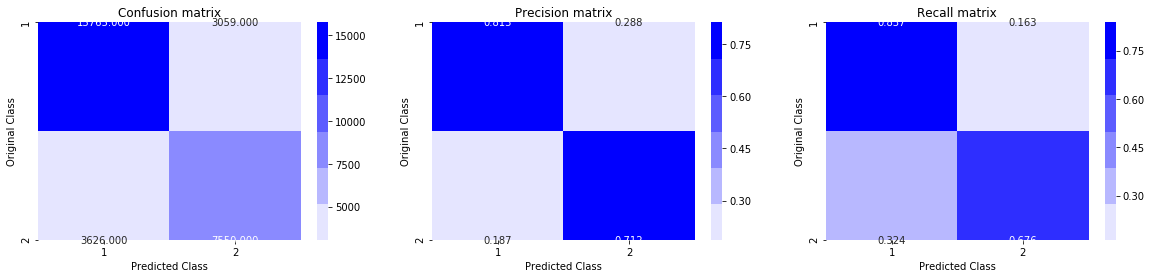

In [52]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# TFIDF VECTORIZING OF TEXT

In [44]:
data=pd.read_csv('nlp_features_train.csv',encoding='latin-1')
data.shape

(404290, 21)

In [45]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [47]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,...,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,...,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [48]:
data = data.drop(['qid1','qid2'],axis=1)
data.shape

(404290, 19)

In [51]:
pre_features = pd.read_csv('df_fe_without_preprocessing_train.csv',encoding='latin-1')
pre_features.shape

(404290, 17)

In [52]:
pre_features.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [53]:
pre_features = pre_features.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
pre_features.shape

(404290, 12)

In [56]:
#joining both basic and advanced features
final_data = data.join(pre_features.set_index('id'), on='id')
final_data.shape

(404290, 30)

In [57]:
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
final_data['question1'] = final_data['question1'].apply(lambda x: str(x))
final_data['question2'] = final_data['question2'].apply(lambda x: str(x))

In [58]:
# Sampling 100k data points for the model
data_100k = final_data.sample(n=100000,random_state = 1)
print(data_100k.shape)

(100000, 30)


In [59]:
print(data_100k['is_duplicate'].value_counts())
print('Percentage of class 0 / class 1 = ',sum(data_100k['is_duplicate']==0)/sum(data_100k['is_duplicate']==1))

0    63062
1    36938
Name: is_duplicate, dtype: int64
Percentage of class 0 / class 1 =  1.7072391575071741


In [60]:
y = data_100k['is_duplicate']
y.shape

(100000,)

In [61]:
# randomly sampling 70% to train and 30% to test dataset
X_train,X_test, y_train, y_test = train_test_split(data_100k, y, stratify=y, test_size=0.3)

In [62]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(70000, 30) (70000,)
(30000, 30) (30000,)


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_1 = TfidfVectorizer(lowercase = False)
X_train_q1 = tfidf_1.fit_transform(X_train['question1'])
X_test_q1 = tfidf_1.transform(X_test['question1'])

print(X_train_q1.shape)
print(X_test_q1.shape)

(70000, 31221)
(30000, 31221)


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_2 = TfidfVectorizer(lowercase = False)
X_train_q2 = tfidf_2.fit_transform(X_train['question2'])
X_test_q2 = tfidf_2.transform(X_test['question2'])

print(X_train_q2.shape)
print(X_test_q2.shape)

(70000, 29097)
(30000, 29097)


In [65]:
X_train.columns

Index(['id', 'question1', 'question2', 'is_duplicate', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio',
       'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'longest_substr_ratio', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
       'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [70]:
#dropping question features from train and test data

X_train = X_train.drop(['id','question1','question2','is_duplicate'],axis=1)
X_test = X_test.drop(['id','question1','question2','is_duplicate'],axis=1)

In [71]:
X_train.shape

(70000, 26)

In [72]:
X_test.shape

(30000, 26)

In [74]:
#creating final data matrix

train_tfidf = hstack((X_train,X_train_q1,X_train_q2)).tocsr()
test_tfidf = hstack((X_test,X_test_q1,X_test_q2)).tocsr()

In [75]:
print(train_tfidf.shape,y_train.shape)
print(test_tfidf.shape,y_test.shape)

(70000, 60344) (70000,)
(30000, 60344) (30000,)


# APPLYING RANDOM MODEL

In [76]:
len_test=len(y_test)
print(len_test)

30000


Log loss on Test Data using Random Model 0.8897116512183535


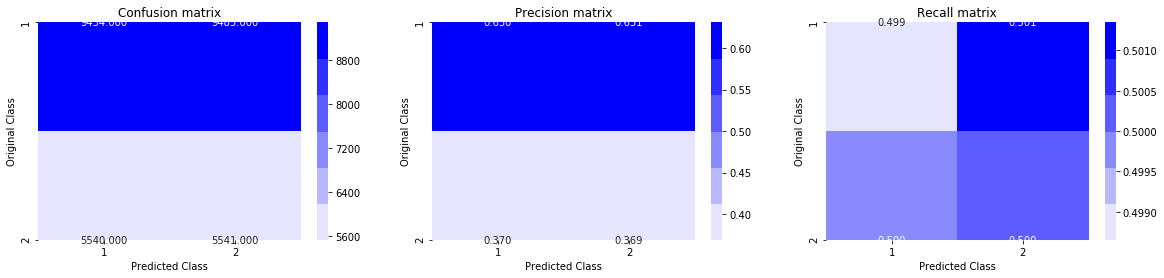

In [77]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((len_test,2))
for i in range(len_test):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

# APPLYING LOGISTIC REGRESSION 

For values of alpha =  1e-05 The log loss is: 0.44546931092826375
For values of alpha =  0.0001 The log loss is: 0.4564936339888479
For values of alpha =  0.001 The log loss is: 0.45643913153086224
For values of alpha =  0.01 The log loss is: 0.43391389458816515
For values of alpha =  0.1 The log loss is: 0.4484759016381897
For values of alpha =  1 The log loss is: 0.4941545003690171
For values of alpha =  10 The log loss is: 0.54748133495596


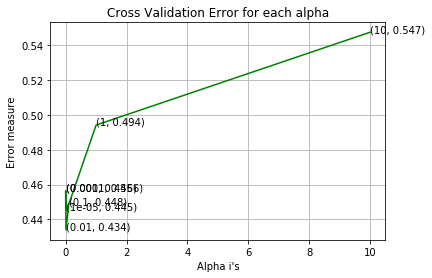

For values of best alpha =  0.01 The train log loss is: 0.43624199361652727
For values of best alpha =  0.01 The test log loss is: 0.43391389458816515
Total number of data points : 30000


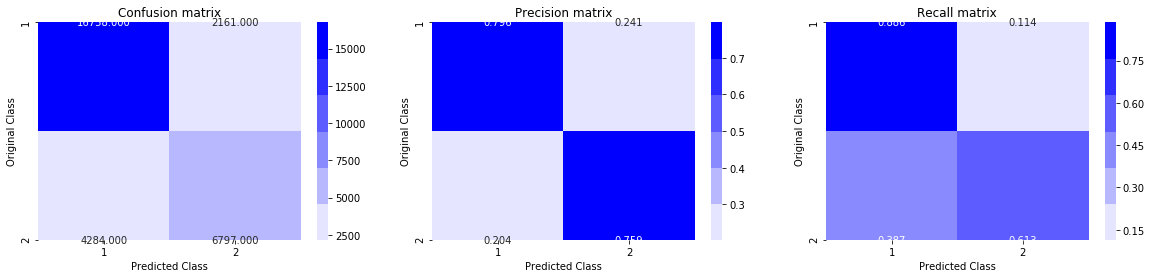

In [78]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# APPLYING LINEAR SVM

For values of alpha =  1e-05 The log loss is: 0.4282500737330938
For values of alpha =  0.0001 The log loss is: 0.44632013062359494
For values of alpha =  0.001 The log loss is: 0.4480142585932002
For values of alpha =  0.01 The log loss is: 0.5221560677742254
For values of alpha =  0.1 The log loss is: 0.4932032812316269
For values of alpha =  1 The log loss is: 0.5769241724874992
For values of alpha =  10 The log loss is: 0.5985429337588483


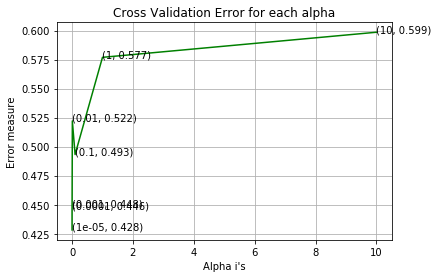

For values of best alpha =  1e-05 The train log loss is: 0.4330276652810609
For values of best alpha =  1e-05 The test log loss is: 0.4282500737330938
Total number of data points : 30000


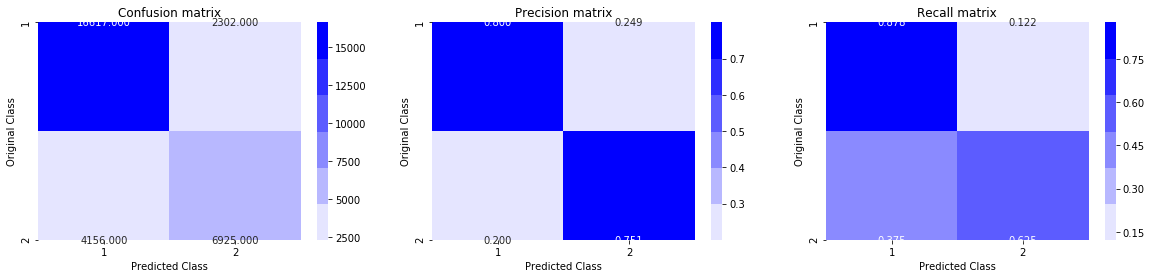

In [79]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# APPLYING XGBOOST

In [82]:
from scipy.stats import randint as rand
params = {
        'max_depth': rand(1,11),
        'n_estimators' : rand(5,100),
        }

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',n_jobs=-1)
Xgboost = RandomizedSearchCV(model, param_distributions = params,n_iter=50, scoring = 'neg_log_loss', n_jobs = -1,cv=3)
Xgboost.fit(X_train, y_train)
Xgboost.best_params_

{'max_depth': 8, 'n_estimators': 97}

In [83]:
model = xgb.XGBClassifier(max_depth = 8, n_estimators = 97,objective ='binary:logistic', eval_metric = 'logloss', n_jobs=-1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("The test log loss is:",log_loss(y_test, y_pred, eps=1e-15))

The test log loss is: 5.709316029737822


In [85]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['n_estimators'] = 97
params['max_depth'] = 8


d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.562202	valid-logloss:0.565291
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.331222	valid-logloss:0.354145
[20]	train-logloss:0.31109	valid-logloss:0.343447
[30]	train-logloss:0.294357	valid-logloss:0.340473
[40]	train-logloss:0.28189	valid-logloss:0.340047
[50]	train-logloss:0.268755	valid-logloss:0.340365
Stopping. Best iteration:
[32]	train-logloss:0.291336	valid-logloss:0.339963

The test log loss is: 0.34032375787159264


Total number of data points : 30000


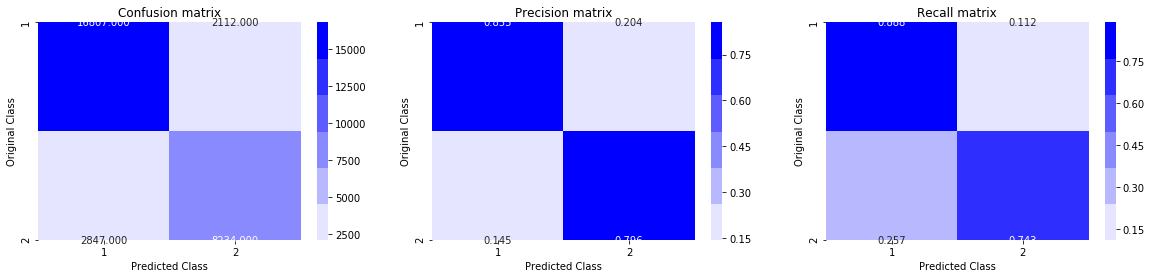

In [86]:
predicted_y =np.array(y_pred>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# RESULTS:

In [92]:
from prettytable import PrettyTable
Conclusion = PrettyTable()
Conclusion.field_names = ["TFIDF MODEL", "Train-Logloss", "Test Logloss"]

Conclusion.add_row(["Logistic Regression", 0.4362,0.4339])
Conclusion.add_row(["Linear SVM", 0.4330, 0.4282])
Conclusion.add_row(["XGBoost",  0.2913, 0.3403])
print(Conclusion)

+---------------------+---------------+--------------+
|     TFIDF MODEL     | Train-Logloss | Test Logloss |
+---------------------+---------------+--------------+
| Logistic Regression |     0.4362    |    0.4339    |
|      Linear SVM     |     0.433     |    0.4282    |
|       XGBoost       |     0.2913    |    0.3403    |
+---------------------+---------------+--------------+
